In [1]:
import qutip, pickle, sys
import matplotlib.pyplot as plt 
import numpy as np
import scipy.optimize as opt 
import scipy.linalg as linalg
import time as time
import math, cmath
import auxiliary_library as me

from IPython.display import display, Math, Latex
np.set_printoptions(threshold=1.e-9,linewidth=120,precision=3, suppress=True, formatter={"float":lambda x: str(.001*int(1000*x))})

In [2]:
N=3; chain_type = "XYZ"; k_B = 1; temp = 1e2; temp_ref = 1e0

### Construcción de los operadores
spin_ops_list = me.one_body_spin_ops(N)
identity_op = spin_ops_list[0][0]
ts = np.linspace(0, 50,700)  

### Heisenberg Hamiltonian
Hamiltonian_paras = [.2, .15, .1, 1.]
H_H = me.Heisenberg_Hamiltonian(op_list = spin_ops_list, chain_type = chain_type,
                                size = N, Hamiltonian_paras = Hamiltonian_paras,
                                closed_bcs = True, visualization = False)
### classical operators 

cl_ops, label_ops = me.classical_ops(H_H, N, spin_ops_list, False)
magnetization = sum(spin_ops_list[3][a] for a in range(len(spin_ops_list[3])))
neel_operator = sum((-1)**a * spin_ops_list[3][a] for a in range(len(spin_ops_list[3])))

cl_ops["magnetization"] = magnetization; label_ops.append("magnetization")
cl_ops["neel_op"] = neel_operator; label_ops.append("neel_op")
print("Are all the operators Hermitian?:", me.basis_hermitian_check(cl_ops))

Are all the operators Hermitian?: [True, True, True, True, True, True, True, True, True, True]


using a base of size  6
rho_ref:  Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.47100000000000003 0.0 0.0 ... 0.024 0.004 0.0]
 [0.0 0.41000000000000003 0.039 ... 0.0 0.0 0.003]
 [0.0 0.039 0.028 ... 0.0 0.0 0.001]
 ...
 [0.024 0.0 0.0 ... 0.026000000000000002 0.002 0.0]
 [0.004 0.0 0.0 ... 0.002 0.0 0.0]
 [0.0 0.003 0.001 ... 0.0 0.0 0.0]]
The basis is orthonormal and hermitian
rho_0:  Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.211+0.j     0.   +0.j     0.   +0.j    ...  0.008+0.011j  0.006-0.009j  0.   +0.j   ]
 [ 0.   +0.j     0.229+0.j    -0.01 +0.039j ...  0.   +0.j     0.   +0.j     0.006-0.012j]
 [ 0.   +0.j    -0.01 -0.039j  0.268+0.j    ...  0.   +0.j     0.   +0.j     0.007+0.018j]
 ...
 [ 0.008-0.011j  0.   +0.j     0.   +0.j    ...  0.016+0.j     0.002-0.002j  0.   +0.j   ]
 [ 0.006+0.009j  0.   +0.j     0.   +0.j    ...  0.002+0.002j  0.01 +0.j     0.

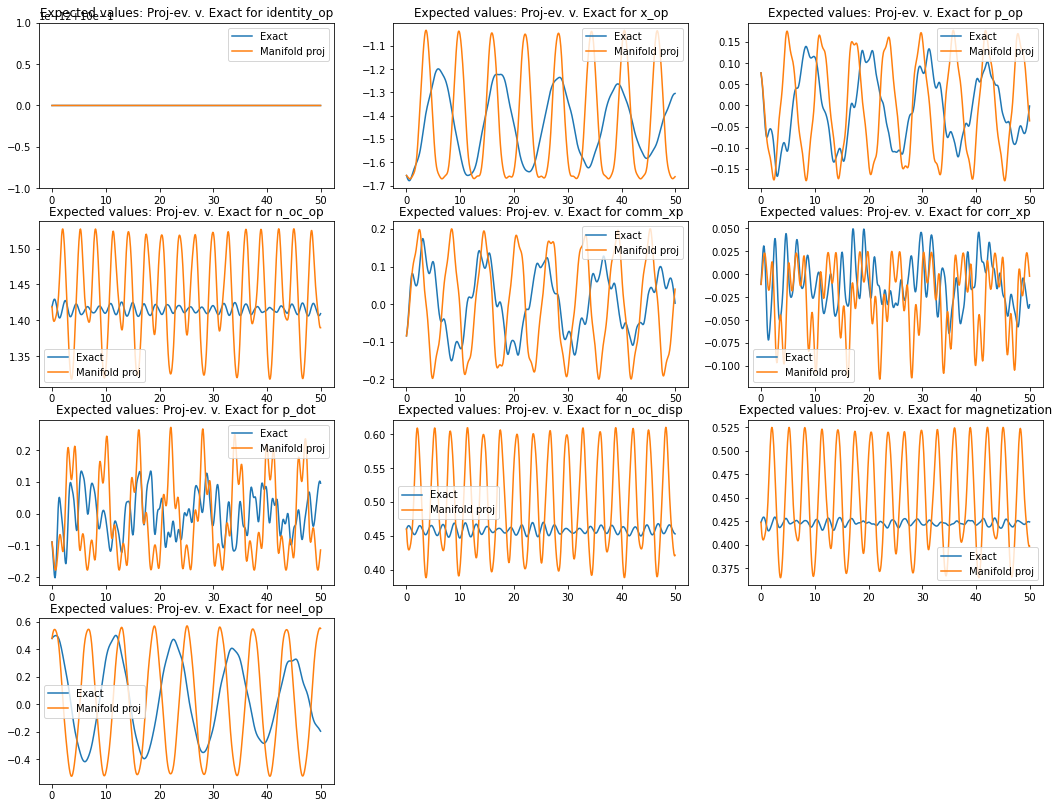

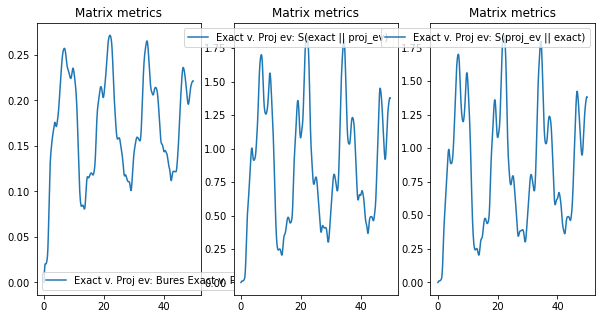

In [4]:
depth_and_seed_ops = [(1, cl_ops["identity_op"]), 
                      (1, H_H), 
                      (4, cl_ops["x_op"])]
coeff_list = [0., .5, .5, .25, .25, .25]

observables = list(cl_ops.values())
Gram_matrix, init_configs_xop, dict_res_proj_ev, res_exact = me.d_depth_proj_ev(
    temp_ref = temp_ref, temp_rho = temp, timespan = ts, 
    Hamiltonian = H_H, lagrange_op = cl_ops["n_oc_disp"],
    depth_and_seed_ops = depth_and_seed_ops, observables = observables, 
    label_ops = label_ops, coeff_list = coeff_list, 
    visualize_H_evs = False, visualization_nonherm = False, visualize_expt_vals = True
)

using a base of size  6
rho_ref:  Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.47100000000000003 0.0 0.0 ... 0.024 0.004 0.0]
 [0.0 0.41000000000000003 0.039 ... 0.0 0.0 0.003]
 [0.0 0.039 0.028 ... 0.0 0.0 0.001]
 ...
 [0.024 0.0 0.0 ... 0.026000000000000002 0.002 0.0]
 [0.004 0.0 0.0 ... 0.002 0.0 0.0]
 [0.0 0.003 0.001 ... 0.0 0.0 0.0]]
The basis is orthonormal and hermitian
rho_0:  Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.202+0.j     0.   +0.j     0.   +0.j    ... -0.02 -0.056j -0.005+0.j     0.   +0.j   ]
 [ 0.   +0.j     0.491+0.j     0.037-0.007j ...  0.   +0.j     0.   +0.j    -0.021+0.033j]
 [ 0.   +0.j     0.037+0.007j  0.036+0.j    ...  0.   +0.j     0.   +0.j    -0.005-0.011j]
 ...
 [-0.02 +0.056j  0.   +0.j     0.   +0.j    ...  0.098+0.j     0.008-0.001j  0.   +0.j   ]
 [-0.005-0.j     0.   +0.j     0.   +0.j    ...  0.008+0.001j  0.008+0.j     0.

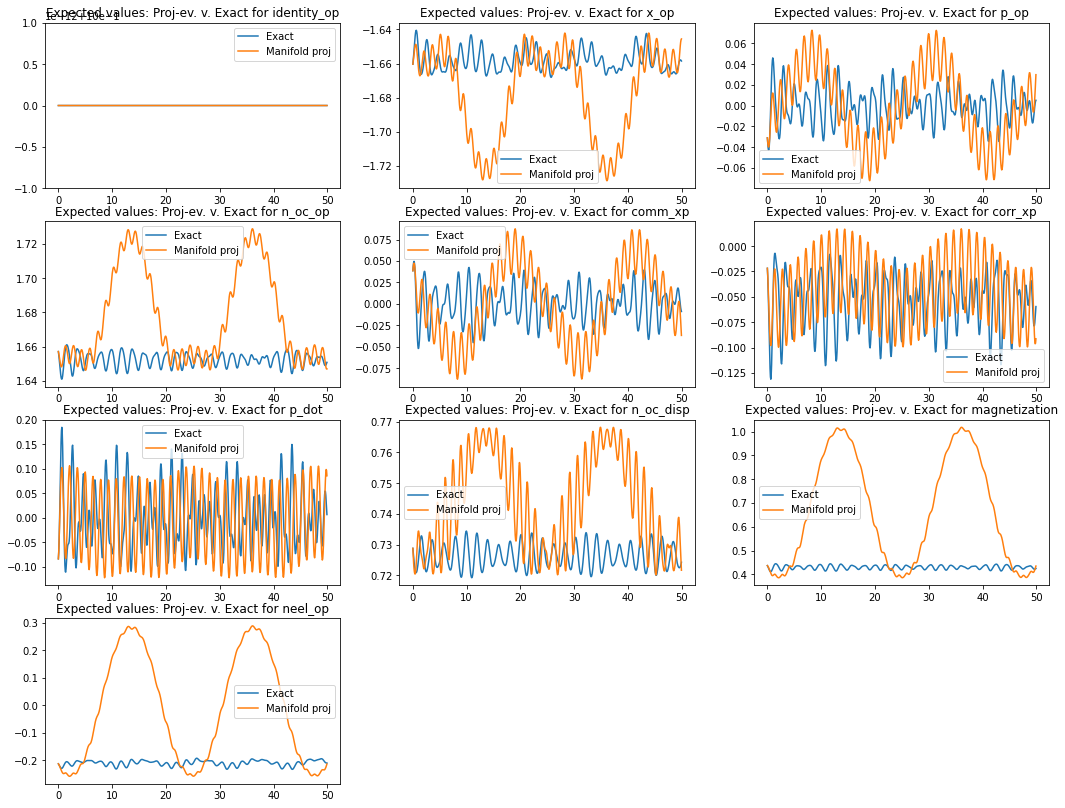

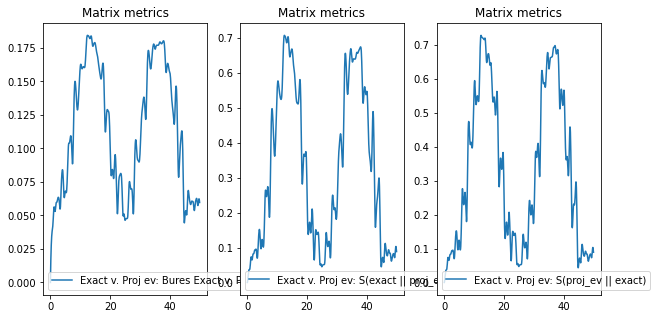

In [5]:
depth_and_seed_ops = [(1, cl_ops["identity_op"]), 
                      (1, H_H), 
                      (4, cl_ops["magnetization"])]
coeff_list = [0., .5, .5, .25, .25, .25]

observables = list(cl_ops.values())
Gram_matrix, init_configs_mg, dict_res_proj_ev, res_exact = me.d_depth_proj_ev(
    temp_ref = temp_ref, temp_rho = temp, timespan = ts, 
    Hamiltonian = H_H, lagrange_op = cl_ops["n_oc_disp"],
    depth_and_seed_ops = depth_and_seed_ops, observables = observables, 
    label_ops = label_ops, coeff_list = coeff_list, 
    visualize_H_evs = False, visualization_nonherm = False, visualize_expt_vals = True
)

In [6]:
cohr_list, coherence = me.mutual_coherence(init_configs_mg["basis_orth"][2:], init_configs_xop["basis_orth"][2:],
                                           init_configs_mg["rho_ref"], me.HS_inner_prod_r)
coherence

0.2915491598723857

In [10]:
def commute_basis_algebra(basis, repeat):
    
    while repeat != 0:
        basis_commute_with_basis = [me.commutator(op1, op2) for op1 in basis
                                                            for op2 in basis]
        repeat -= 1
    return basis_commute_with_basis

commute_basis_algebra(init_configs_mg["basis_orth"], 10)

[Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
 Qobj data =
 [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]
  ...
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]],
 Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
 Qobj data =
 [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]
  ...
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]],
 Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
 Qobj data =
 [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]
  ...
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]],
 Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = Tr